In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


In [4]:
# Load the dataset
file_path = '../data/processed/births_PT_limpo.csv'  # Update with actual path
births_data = pd.read_csv(file_path)

# Convert 'Date' to datetime and set as index
births_data['Date'] = pd.to_datetime(births_data['Date'])
births_data.set_index('Date', inplace=True)
births_data.head()


,Births
Date,
1901-01-01,15178.0
1901-02-01,15826.0
1901-03-01,14132.0
1901-04-01,16179.0
1901-05-01,15070.0


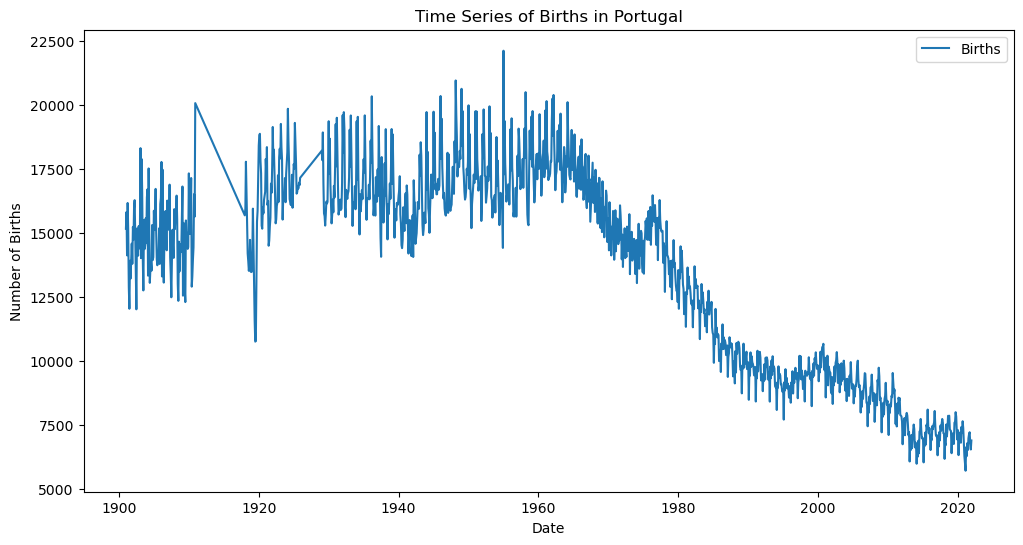

In [5]:
# Plotting the time series
plt.figure(figsize=(12, 6))
plt.plot(births_data['Births'], label='Births')
plt.title('Time Series of Births in Portugal')
plt.xlabel('Date')
plt.ylabel('Number of Births')
plt.legend()
plt.show()


In [6]:
# Performing Augmented Dickey-Fuller test
adf_test = adfuller(births_data['Births'].dropna())

# Displaying ADF test results
adf_result = {
    'ADF Statistic': adf_test[0],
    'p-value': adf_test[1],
    'Used Lag': adf_test[2],
    'Number of Observations Used': adf_test[3],
    'Critical Values': adf_test[4],
}
adf_result


{'ADF Statistic': 0.1662670456905947,
 'p-value': 0.9703048705330012,
 'Used Lag': 24,
 'Number of Observations Used': 1427,
 'Critical Values': {'1%': -3.4349408214067227,
  '5%': -2.8635675309927153,
  '10%': -2.5678494453155656}}

## Analysis and Conclusion

### Time Series Plot
The time series plot of births in Portugal provides a visual inspection of the data. It is crucial for identifying any obvious trends, seasonality, or irregular patterns in the data.

### Augmented Dickey-Fuller Test
The Augmented Dickey-Fuller (ADF) test is a formal statistical test for stationarity. The key components of the ADF test result are:

- **ADF Statistic**: A more negative value suggests a stronger rejection of the hypothesis of a unit root (non-stationarity).
- **p-value**: Provides the probability of the null hypothesis (that the time series is non-stationary). A lower p-value (typically < 0.05) indicates stationarity.
- **Critical Values**: These values are used to compare with the ADF statistic to determine stationarity at different confidence levels.

### Results
- **ADF Statistic**: 0.1663
- **p-value**: 0.9703
- **Critical Values**: {'1%': -3.4349, '5%': -2.8636, '10%': -2.5678}

The high p-value and the ADF statistic being greater than the critical values indicate that we cannot reject the null hypothesis of non-stationarity.

### Conclusion
The time series of births in Portugal appears to be non-stationary based on the ADF test. This suggests that the statistical properties of the series (like mean and variance) are not consistent over time.
